Example 2: Analysis of a resonator fabricated at Argonne National Laboratory
======================

**By: Faustin Carter, 2016, updated 2017**

This notebook imports the data from the Agilent files, creates resonator objects from each datafile, packs those objects into a list, runs a semi-intelligent fitting algorithm predicated on the fact that things don't change too much from one temperature to the next, and then plots the data and fit curves in a nice way.

Once you've understood this example, you should be able to replicate it with your own data simply be writing a custom `process_file` function and updating the code that finds the datafiles.


Note: Before starting this example, you'll want to read up on list comprehensions and Python's built-in `map` method if you aren't already familiar with them.

In [1]:
#Set up the notebook for inline plotting
%matplotlib inline

#For high-res figures. You can comment this out if you don't have a retina screen
%config InlineBackend.figure_format = 'retina' 

#Because you should always import numpy!
import numpy as np

Load up the `scraps` modules
----------
You'll need to change the path to reflect wherever you stored the code

In [2]:
import os

#Add the scraps folder to the path. You can skip this if you used pip to install scraps.
import sys
sys.path.append(os.getcwd()+'scraps/')

#Load up the resonator code!
import scraps as scr

Make a list of Resonator objects
-----------
Lists are a great way to organize things. `scraps` includes a tool for easily indexing lists of Resonator objects by temperature and power. Each object has a value called `itemp` that is just the experiment temperature rounded to the nearest 5 mK. This helps a lot with organizing data taken at the 'same' temperature that has fluctuations.

In [3]:
#Path to data (you should look and see what it looks like)
dataPath = './ExampleData/'

#Define a resonator name. The data folder has data for RES-1, RES-2, RES-3, RES-4 so any of those will work.
#Try changing the name to one of the others and rerun the notebook.
resName = 'RES-1'

#We pass the process file and the path to the data, and the built-in routine spits out a list of Resonator objects!
resList = scr.makeResList(scr.process_file, dataPath, resName)

#Create index vectors for all temps and pwrs in the experiment

#itemp = temp rounded to the nearest 5 mK
tempsList = np.unique([res.temp for res in resList])
pwrsList = np.unique([res.pwr for res in resList])

#Let's look at all the temperatures and powers in the experiment
print('number of resonators in list = ', len(resList))
print('temps = ', tempsList)
print('powers = ', pwrsList)
print('temps x powers = ', len(tempsList)*len(pwrsList))

#Can you figure out why the number of resonators in resList is different from temps*powers?
#Hint: look in the data folder at the names of the data files and compare temperatures.

number of resonators in list =  255
temps =  [ 0.089  0.095  0.098  0.1    0.111  0.112  0.113  0.125  0.126  0.127
  0.141  0.142  0.143  0.158  0.159  0.16   0.161  0.175  0.176  0.177
  0.193  0.195  0.196  0.213  0.214  0.215  0.234  0.235  0.25   0.251
  0.271  0.272  0.31   0.341  0.384  0.423  0.463  0.511  0.548  0.587
  0.628  0.629  0.668  0.669  0.707  0.749  0.75   0.787  0.788  0.829
  0.83   0.87   0.871  0.913  0.914  0.955  0.956  0.997  0.998  1.035
  1.036  1.037  1.069  1.071  1.072  1.105  1.107  1.145  1.146  1.147
  1.187  1.189  1.191  1.225  1.226  1.227  1.228  1.229  1.339  1.34
  1.343  1.344  1.415  1.419  1.42   1.421  1.422  1.494  1.495  1.568
  1.569  1.571  1.573  1.643  1.644  1.647  1.649  1.65   1.727  1.73
  1.733  1.809  1.811  1.813  1.814  1.817  1.888  1.889  1.892  1.894
  1.973  1.974  2.037  2.04   2.044  2.045  2.047  2.112  2.115  2.119
  2.121  2.181  2.189  2.19   2.195  2.196  2.263  2.265  2.266  2.268
  2.343  2.347  2.348  2.353  2.35

Fit I and Q data to a model
--------------
This fits I and Q data simultaneously using the built in ``cmplxIQ`` routine.

In [4]:
for res in resList:
    #Load in the params
    res.load_params(scr.cmplxIQ_params)
    
    #Do the fit
    res.do_lmfit(scr.cmplxIQ_fit)

Make a pretty plot
---------
Fits aren't worth anything if you don't plot the results!!

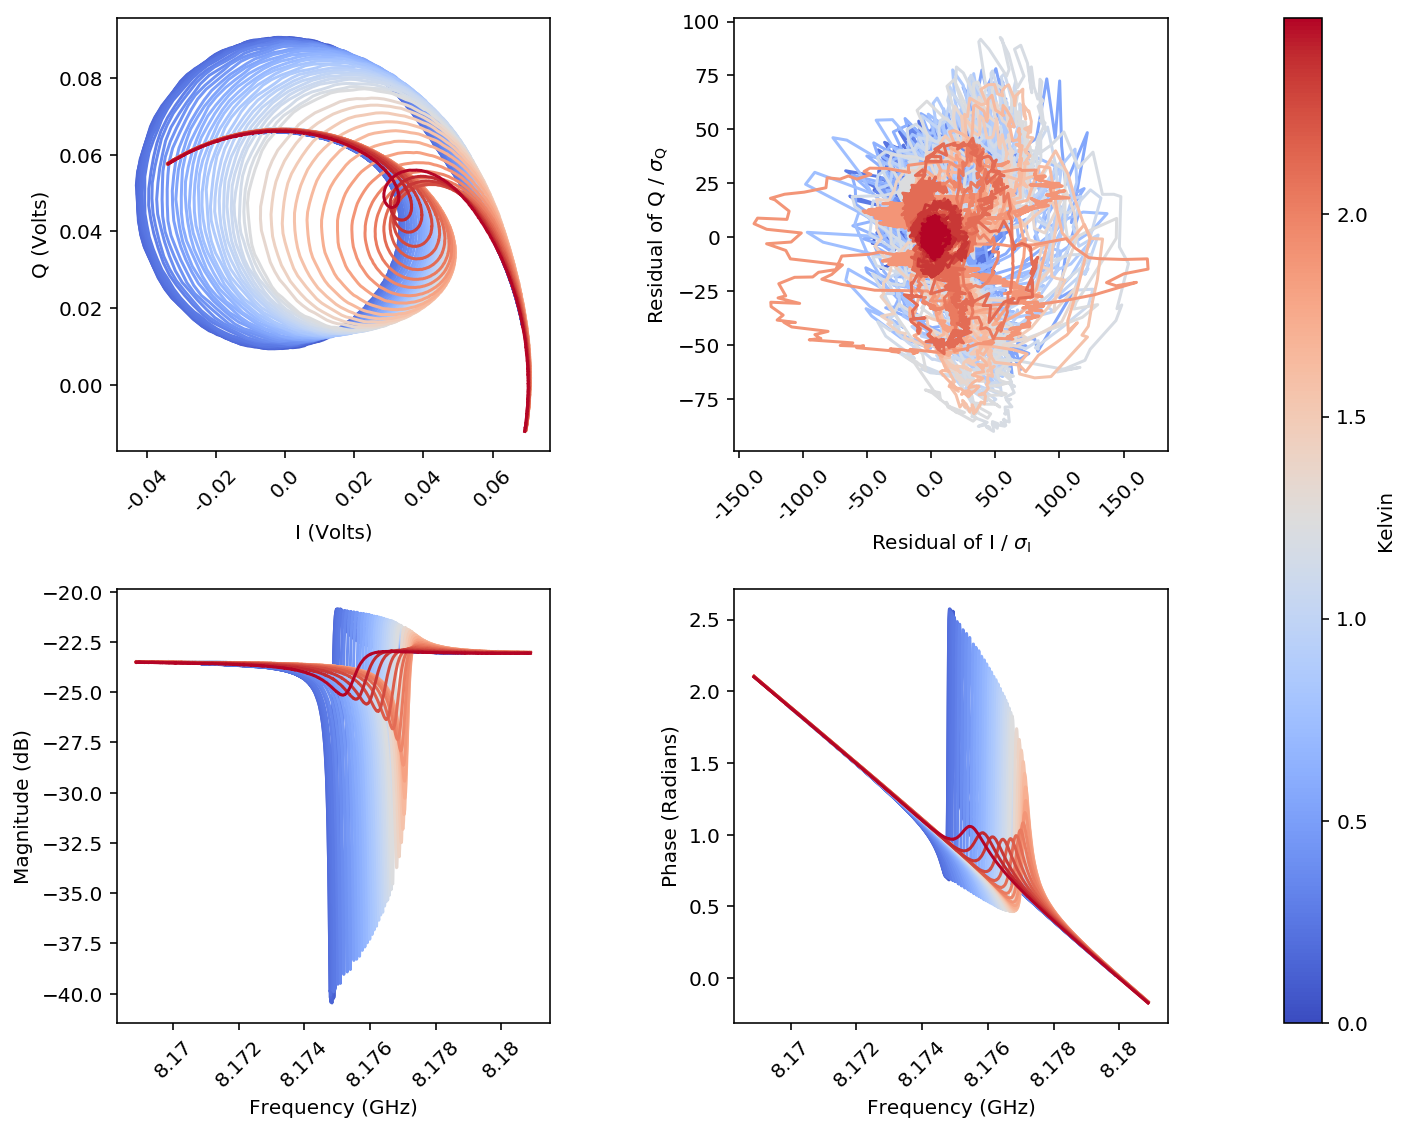

In [7]:
figA = scr.plotResListData(resList,
                            plot_types=['IQ', #Real vs Imaginary part of S21
                                        'rIQ', #residual of fits in IQ plane
                                        'LogMag', #Magnitude of S21 vs frequency
                                        'Phase'], #Phase of S21 vs frequency
                            color_by='temps',
                            fig_size=4,
                            powers=[-20],
                            num_cols = 2,
                            force_square = True,
                            plot_fits = [False]*4) #<-- need to specify a boolean for each plot type

Use the ``ResonatorSweep`` object to look at fit parameters
---
Usually what we are really interested in is the fit parameters as functions of temperature at different powers. There is a nice object we can use to look at this easily.

In [8]:
#Pack all of the fit data into resSweep, and use the 'block' index method
#to figure out which temperatures are nominally the same
resSweep = scr.ResonatorSweep(resList, index='block')

#Look at the first few frequencies:
print('\nf0\n',resSweep['f0'].head())

#and the first few reduced-chi-squared values
print('\nredchi\n',resSweep['redchi'].head())


f0
               -50.0         -40.0         -30.0         -20.0         -10.0
96.0   8.174975e+09  8.174912e+09  8.174903e+09  8.174897e+09  8.174890e+09
112.0  8.174932e+09  8.174883e+09  8.174874e+09  8.174870e+09  8.174866e+09
126.0  8.174914e+09  8.174854e+09  8.174842e+09  8.174839e+09  8.174835e+09
142.0  8.174889e+09  8.174819e+09  8.174810e+09  8.174806e+09  8.174806e+09
160.0  8.174859e+09  8.174799e+09  8.174785e+09  8.174787e+09  8.174789e+09

redchi
           -50.0      -40.0      -30.0      -20.0       -10.0
96.0   1.495088  22.843695  28.455501  38.214780  258.204772
112.0  6.112850  28.353847  32.134005  75.482957  532.721916
126.0  1.889137  20.585032  58.884990  42.484026  146.677615
142.0  2.398259  19.541072  35.529321  48.696257   35.188619
160.0  1.862983  59.830557  35.014426  53.491934   38.018223


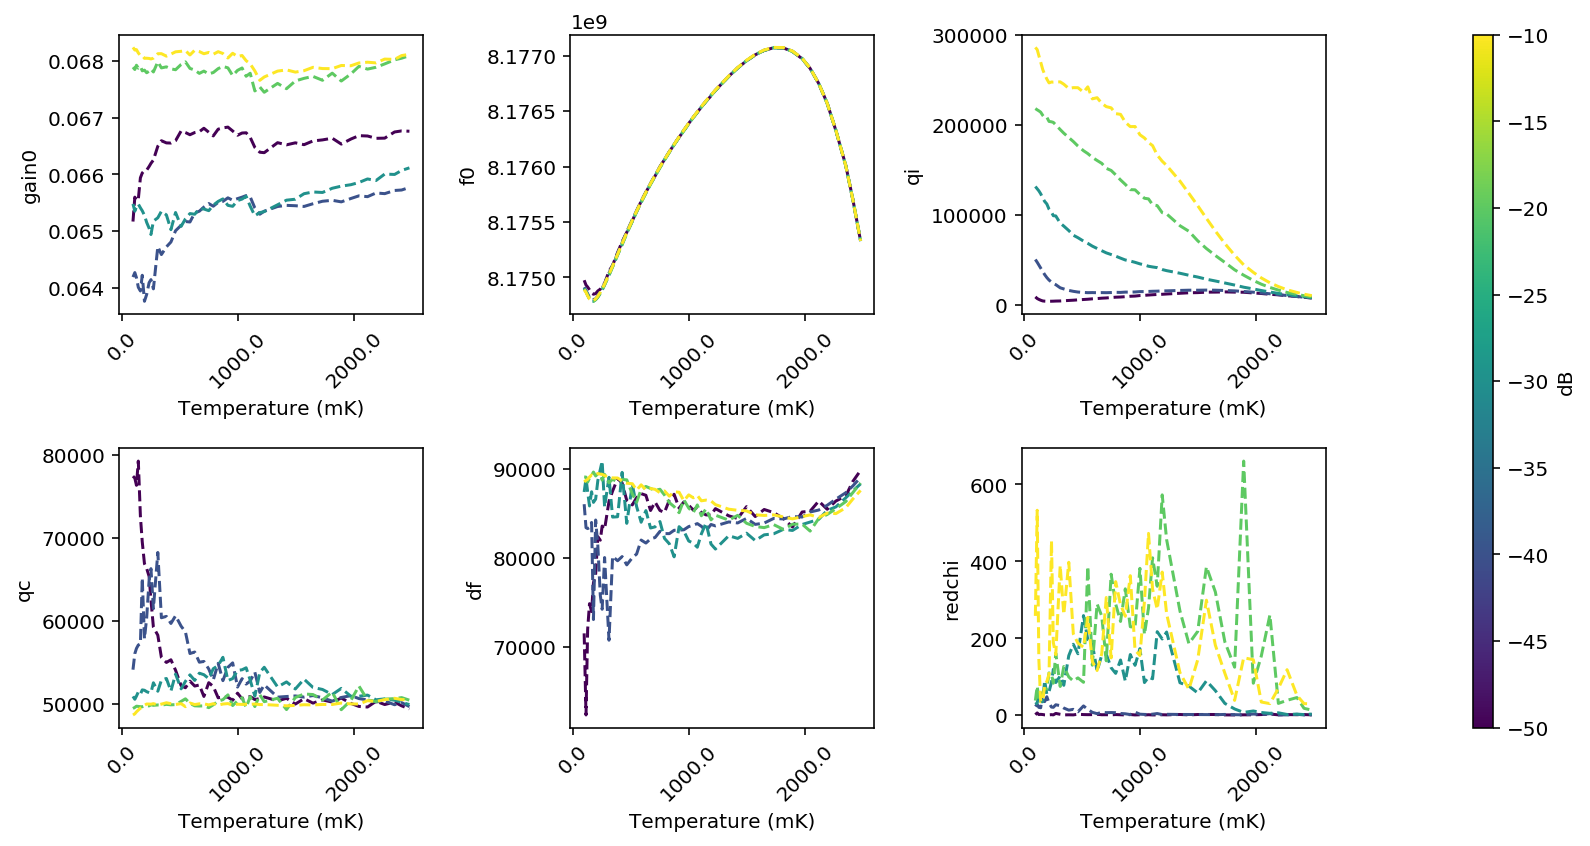

In [9]:
#Now let's make a plot of some of the parameters!

figS = scr.plotResSweepParamsVsTemp(resSweep,
                                   plot_keys=['gain0', 'f0', 'qi', 'qc', 'df', 'redchi'],
                                   num_cols = 3)

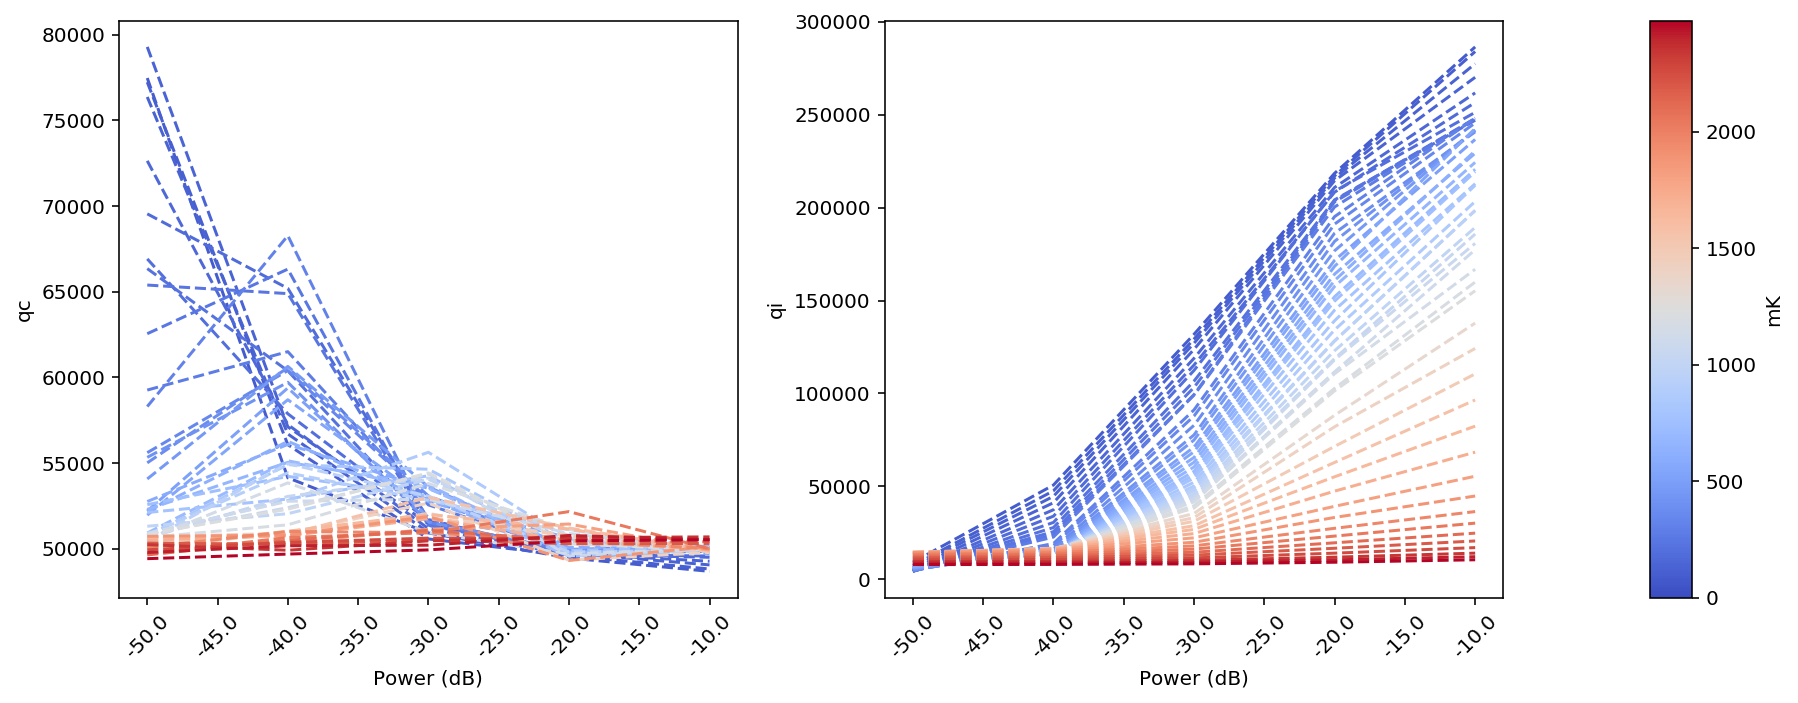

In [10]:
#Or maybe you just want to look at how Q varies with power at different temperatures:
figS2 = scr.plotResSweepParamsVsPwr(resSweep,
                                   plot_keys=['qc', 'qi'],
                                   fig_size = 5)

In [ ]:
#Now you should try running the emcee fitter on all the traces and compare the plots.
#You can get the mc output by asking to plot 'f0_mc' instead of 'f0', for instance.